## Midterm
휴먼지능정보공학과<BR>
201910787<BR>
김영서<BR>

In [1]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import thinkstats2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings('ignore')

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

PI2 = np.pi * 2

%matplotlib inline

### 1. perfect_pitch.wav를 read하고 소리를 들어보세요

In [2]:
wave = thinkdsp.read_wave('perfect_pitch.wav')
wave.normalize()
wave.make_audio()

thinkdsp의 **read_wave**함수를 이용해 `perfect_pitch.wav`를 읽어 들이고, **make_audio**함수를 이용해 소리를 들을 수 있다.

### 2. perfect_pitch.wav의 framerate은?

In [3]:
thinkdsp.read_wave('perfect_pitch.wav').framerate

48000

**read_wave**함수의 **framerate**를 이용해 `perfect_pitch.wav`의 framerate을 구할 수 있다.
- 답: 48000 per second

### 3. perfect_pitch.wav에서는 몇 개의 음계가 포함되어 있는가?

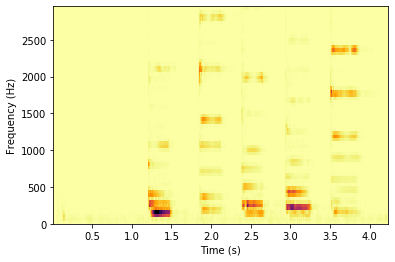

In [4]:
spectro = wave.make_spectrogram(seg_length=1024)
spectro.plot(high=3000)
thinkplot.config(xlabel='Time (s)', ylabel='Frequency (Hz)')

**make_spectrogram**을 이용해 각 segment 별로 spectrum을 plot한 spectrogram을 볼 수 있고, spectrogram을 통해 해당 파일에 포함된 음계 개수를 구할 수 있다.
* 답: 5개<br>
-1번째 음계: 약 1.25 ~ 1.6 sec <br>
-2번째 음계: 약 1.8 ~ 2.2 sec <br>
-3번째 음계: 약 2.4 ~ 2.9 sec <br>
-4번째 음계: 약 3.0 ~ 3.5 sec <br>
-5번째 음계: 약 3.5 ~ 4.0 sec <br>

### 4. spectrum 분석을 이용하여 perfect_pitch에 포함되어 있는 음을 모두 순서대로 찾으세요.

#### 1) 1번째 음 (약 1.25 ~ 1.6 sec)

In [5]:
segment = wave.segment(start=1.2, duration=0.3)
segment.make_audio()

**spectrum**은 다음과 같다.

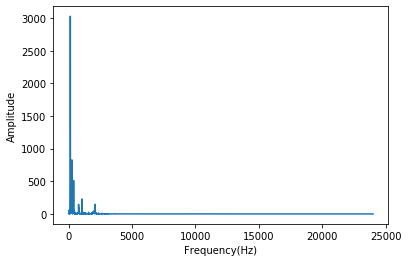

In [6]:
spectrum = segment.make_spectrum()
spectrum.plot()
thinkplot.config(xlabel='Frequency(Hz)')
thinkplot.config(ylabel='Amplitude')

**fundamental frequency**와 **dominant frequency**를 찾기 위해 zoom해보면 다음과 같다.

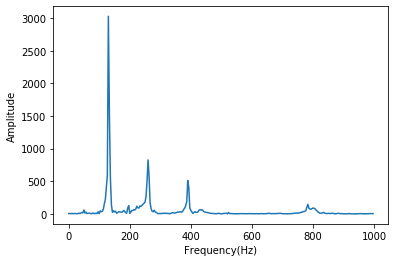

In [7]:
spectrum.plot(1000)
thinkplot.config(xlabel='Frequency(Hz)')
thinkplot.config(ylabel='Amplitude')

`peak`를 이용하여 spectrum의 가장 높은 지점과 해당 주파수를 내림차순으로 출력하면 다음과 같다.

In [8]:
spectrum.peaks()[:10]

[(3027.446701345115, 130.0),
 (1542.8671411658668, 133.33333333333334),
 (827.0779620981218, 260.0),
 (586.7237080963874, 126.66666666666667),
 (572.4084251949181, 263.33333333333337),
 (545.486345345614, 136.66666666666669),
 (510.758088526277, 390.0),
 (504.07198883210077, 256.6666666666667),
 (409.7885193780065, 393.33333333333337),
 (400.845638599545, 123.33333333333334)]

-Dominant frequency는 **130 Hz**<BR>
-Fundamental frequency는 **130 Hz**

`peak`를 통해 소리의 추출된 pitch는 **Fundamental frequency**에 의해 결정된다.
131 Hz는 C3(130.8128)인 3옥타브 도에 해당한다.
* 답: 도(C3)

#### 2) 2번째 음 (약 1.8 ~ 2.2 sec)
(2번째 음부터는 동일한 과정이기 때문에 풀이과정을 생략하고 코드만 넣었습니다.)

In [9]:
segment = wave.segment(start=1.8, duration=0.4)
segment.make_audio()

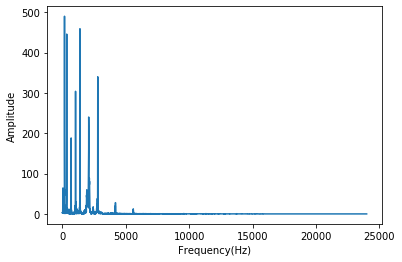

In [10]:
spectrum = segment.make_spectrum()
spectrum.plot()
thinkplot.config(xlabel='Frequency(Hz)')
thinkplot.config(ylabel='Amplitude')

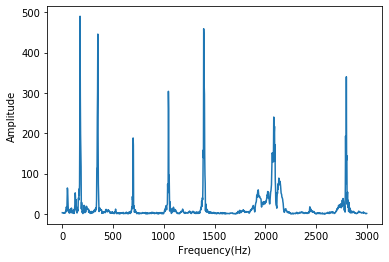

In [11]:
spectrum = segment.make_spectrum()
spectrum.plot(3000)
thinkplot.config(xlabel='Frequency(Hz)')
thinkplot.config(ylabel='Amplitude')

In [12]:
spectrum.peaks()[:10]

[(490.0459082685013, 175.0),
 (459.0456828435215, 1392.5),
 (445.8050167312803, 350.0),
 (438.9529818537095, 1395.0),
 (339.97194756302616, 2797.5),
 (317.7744290506969, 1397.5),
 (303.95927142778953, 1045.0),
 (302.9789695936407, 347.5),
 (296.50507155639326, 1400.0),
 (292.8515239285301, 177.5)]

-Dominant frequency는 **175 Hz**<BR>
-Fundamental frequency는 **175 Hz**

175 Hz는 F3(174.6141)인 3옥타브 파에 해당한다.
* 답: 파(F3) (spectrum상 F3이지만 실제로 비교해보면 F4와 더 유사한거 같다.)

#### 3) 3번째 음 (약 2.4 ~ 2.9 sec)

In [13]:
segment = wave.segment(start=2.4, duration=0.5)
segment.make_audio()

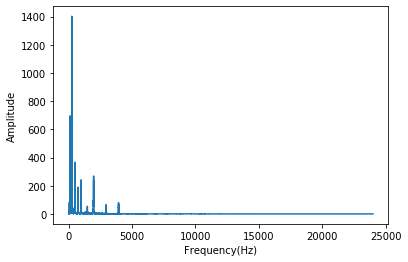

In [14]:
spectrum = segment.make_spectrum()
spectrum.plot()
thinkplot.config(xlabel='Frequency(Hz)')
thinkplot.config(ylabel='Amplitude')

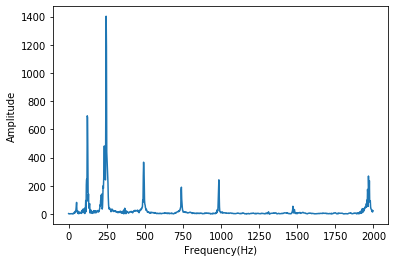

In [15]:
spectrum = segment.make_spectrum()
spectrum.plot(2000)
thinkplot.config(xlabel='Frequency(Hz)')
thinkplot.config(ylabel='Amplitude')

In [16]:
spectrum.peaks()[:10]

[(1402.3073477287185, 246.0),
 (1186.7506026356602, 248.0),
 (805.8782481444712, 244.0),
 (695.8247513253258, 122.0),
 (684.5789277501691, 124.0),
 (482.1262702524857, 234.0),
 (438.6711272219121, 250.0),
 (384.8238740234775, 252.0),
 (366.8011864414159, 492.0),
 (336.48719118837505, 126.0)]

-Dominant frequency는 **246 Hz**<BR>
-Fundamental frequency는 **122 Hz**

122 Hz는 B2(123.4708)인 2옥타브 시에 해당한다.
* 답: 시(B2)

#### 4) 4번째 음 (3.0 ~ 3.5 sec)

In [17]:
segment = wave.segment(start=3.0, duration=0.5)
segment.make_audio()

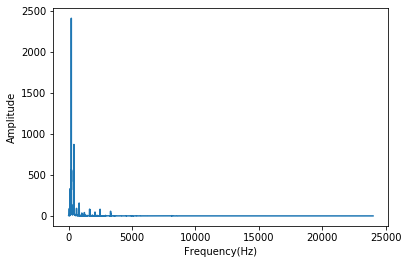

In [18]:
spectrum = segment.make_spectrum()
spectrum.plot()
thinkplot.config(xlabel='Frequency(Hz)')
thinkplot.config(ylabel='Amplitude')

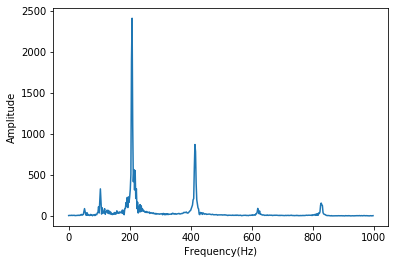

In [19]:
spectrum = segment.make_spectrum()
spectrum.plot(1000)
thinkplot.config(xlabel='Frequency(Hz)')
thinkplot.config(ylabel='Amplitude')

In [20]:
spectrum.peaks()[:10]

[(2409.8873829852714, 208.0),
 (1899.6833277953979, 206.0),
 (1093.5949952030187, 210.0),
 (871.0777097975841, 414.0),
 (783.745505424407, 416.0),
 (580.9115943046049, 412.0),
 (565.1874337723087, 214.0),
 (553.653405313973, 218.0),
 (502.5992634576757, 204.0),
 (417.58053433792026, 212.0)]

-Dominant frequency는 **208 Hz**<BR>
-Fundamental frequency는 **208 Hz**

208 Hz는 G#3(207.6523)인 3옥타브 솔 샵에 해당한다.
* 답: 솔#(G#3)

#### 5) 5번째 음 (3.5 ~ 4.0 sec)

In [21]:
segment = wave.segment(start=3.5, duration=0.5)
segment.make_audio()

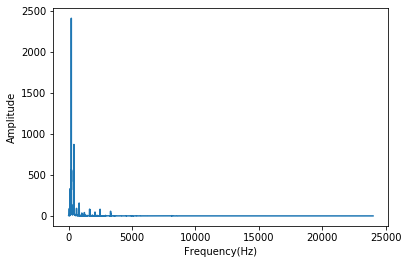

In [126]:
spectrum = segment.make_spectrum()
spectrum.plot()
thinkplot.config(xlabel='Frequency(Hz)')
thinkplot.config(ylabel='Amplitude')

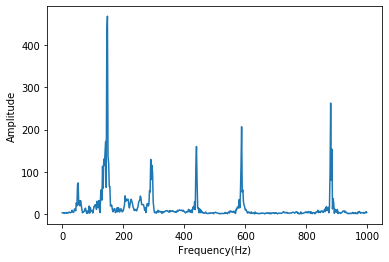

In [23]:
spectrum = segment.make_spectrum()
spectrum.plot(1000)
thinkplot.config(xlabel='Frequency(Hz)')
thinkplot.config(ylabel='Amplitude')

In [24]:
spectrum.peaks()[:10]

[(749.6949523746251, 2346.0),
 (697.3813067393339, 2344.0),
 (695.9349356917896, 2352.0),
 (611.0094024803312, 1758.0),
 (536.267222046641, 1172.0),
 (529.2020432337758, 1754.0),
 (503.1588134729546, 1176.0),
 (499.70898682375247, 1762.0),
 (468.64739592811185, 148.0),
 (451.6904450030805, 1760.0)]

-Dominant frequency는 **2346 Hz**<BR>
-Fundamental frequency는 **148 Hz**

148 Hz는 D3(146.8324)인 3옥타브 레에 해당한다.
* 답: 레(D3)

### 5. autocorrelation을 이용하여 perfect_pitch에 포함되어 있는 음을 모두 순서대로 찾으세요.

`estimate_fundamental` 함수의 **autocorrelation**을 이용하여 **fudamental frequency**를 찾는 방법은 다음과 같다,

In [124]:
from autocorr import autocorr

def estimate_fundamental(segment, low=230, high=330):
    lags, corrs = autocorr(segment)
    lag = np.array(corrs[low:high]).argmax() + low
    period = lag / segment.framerate
    frequency = 1 / period
    return frequency

#### 1) 1번째 음 (약 1.25 ~ 1.6 sec)

In [80]:
segment = wave.segment(start=1.25, duration=0.5)
freq = estimate_fundamental(segment)
freq

131.86813186813185

1번째 음의 spectrum의  fudamental frequency가 130Hz (C3)이므로, `estimate_fundamental`의 결과 또한 **약 130Hz**인것을 확인할 수 있다.
* 답: 도 (C3)

#### 2) 2번째 음 (약 1.8 ~ 2.2 sec)

In [81]:
segment = wave.segment(start=1.8, duration=0.4)
freq = estimate_fundamental(segment)
freq

174.54545454545456

2번째 음의 spectrum의  fudamental frequency가 175Hz (F3)이므로, `estimate_fundamental`의 결과 또한 **약 175Hz**인것을 확인할 수 있다.
* 답: 파 (F3)

#### 3) 3번째 음 (약 2.4 ~ 2.9 sec)

In [105]:
segment = wave.segment(start=2.4, duration=0.5)
freq = estimate_fundamental(segment)
freq

123.39331619537273

3번째 음의 spectrum의  fudamental frequency가 122Hz (B3)이므로, `estimate_fundamental`의 결과 또한 **약 122Hz**인것을 확인할 수 있다.
* 답: 시 (B3)

#### 4) 4번째 음 (약 3.0 ~ 3.5 sec)

In [125]:
segment = wave.segment(start=3.0, duration=0.5)
freq = estimate_fundamental(segment)
freq

207.7922077922078

4번째 음의 spectrum의  fudamental frequency가 208Hz (G#3)이므로, `estimate_fundamental`의 결과 또한 약 **208Hz**인것을 확인할 수 있다.
* 답: 솔# (G#3)

#### 5) 5번째 음 (약 3.5 ~ 4.0 sec)

In [114]:
segment = wave.segment(start=3.5, duration=0.5)
freq = estimate_fundamental(segment)
freq

146.78899082568807

5번째 음의 spectrum의  fudamental frequency가 148Hz (D3)이므로, `estimate_fundamental`의 결과 또한 약 **148Hz**인것을 확인할 수 있다.
* 답: 레 (D3)

### 6. perfect_pitch를 분석해보고 디지털신호처리 관점에서 느낀점은? (코드 작성은 필요없는 문항임)

thinkdsp 라이브러리를 사용해 wav형태로 저장된 오디오 파일 속 음계를 분석하는 것이 매우 흥미로웠다.<br>
분석 과정에서 가장 힘들였던 부분은 spectrogram에서 음계에 해당하는 frequency가 몇 초에 존재하는지 파악하는 것이었다. 인위적으로 지정해줘야하는 것이 생각보다 정확도가 낮다는 것을 느꼈다. 그래서 기회가 된다면 spectrogram에서 시간(s)과 frequency의 관계를 나타낼 수 있는 함수를 만들어보고 싶다.(이미 있다면 사용해보고 싶다.)<BR>
하지만 라이브러리에 내장된 수많은 함수들 중 적절한 함수를 호출시켜 원하는 결과를 출력하는 과정 속에서 큰 성취감을 얻을 수 있었다. <br>